"""
# Step 1: Import Required Libraries
"""

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


"""
# Step 2: Load and Explore Dataset
"""

In [35]:
df = pd.read_csv(r"C:\Users\HP\linear_regression_model\summative\linear_regression\maternal.csv")
  # Replace with actual dataset path
display(df.head())
display(df.info())


display(df.describe())

,Age,SystolicBP,DiastolicBP,Blood glucose,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1014 non-null   int64  
 1   SystolicBP     1014 non-null   int64  
 2   DiastolicBP    1014 non-null   int64  
 3   Blood glucose  1014 non-null   float64
 4   BodyTemp       1014 non-null   float64
 5   HeartRate      1014 non-null   int64  
 6   RiskLevel      1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


None

,Age,SystolicBP,DiastolicBP,Blood glucose,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


"""
# Step 3: Preprocessing - Selecting Features and Target
"""

In [36]:
X = df.drop(columns=["Age"])  # filtering out age column
y = df["HeartRate"]

In [37]:
print(df.isnull().sum())  # Shows how many missing values each column has


Age              0
SystolicBP       0
DiastolicBP      0
Blood glucose    0
BodyTemp         0
HeartRate        0
RiskLevel        0
dtype: int64


In [44]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # or LinearRegression, depending on your task

# Load the dataset (adjust according to your data format)
df = pd.read_csv(r"C:\Users\HP\linear_regression_model\summative\linear_regression\maternal.csv")

# Define the features and target
features = ['Age', 'SystolicBP', 'DiastolicBP', 'Blood glucose', 'BodyTemp', 'HeartRate']
target = 'RiskLevel'  # Assuming 'RiskLevel' is your target column

# Select features and target
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model (for classification)
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'risk_level_model.pkl')

# Model is now saved, and can be used for predictions


c:\Users\HP\linear_regression_model\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['risk_level_model.pkl']

In [ ]:
import joblib
import pandas as pd
import numpy as np

# Load the trained model
model = joblib.load('risk_level_model.pkl')

# Example input for prediction (make sure the input matches the feature format)
# Create a DataFrame with the appropriate column names
test_input = pd.DataFrame([[30, 120, 80, 90, 36.5, 72]], columns=['Age', 'SystolicBP', 'DiastolicBP', 'Blood glucose', 'BodyTemp', 'HeartRate'])

# Make the prediction
prediction = model.predict(test_input)[0]

# Print the prediction result (risk level)
print(f"Predicted Risk Level: {prediction}")


Predicted Risk Level: 2


: 


"""
# Step 4: Splitting Data into Training and Testing Sets
"""

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


"""
# Step 5: Feature Scaling
"""

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'SystolicBP', 'DiastolicBP', 'Blood glucose', 'BodyTemp', 'HeartRate']]  # Features
y = df['RiskLevel']  # Target (the value we want to predict)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



"""
# Step 6: Linear Regression using Gradient Descent
"""

In [12]:
best_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
loss_train, loss_test = [], []

for i in range(1, 101):
    best_model.partial_fit(X_train, y_train)
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    loss_train.append(mean_squared_error(y_train, y_train_pred))
    loss_test.append(mean_squared_error(y_test, y_test_pred))

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train}")
print(f"Testing MSE: {mse_test}")


Training MSE: 0.0624897925591644
Testing MSE: 0.19319352877327628


 Plot the Training and Testing Loss Over Epochs (Iterations)

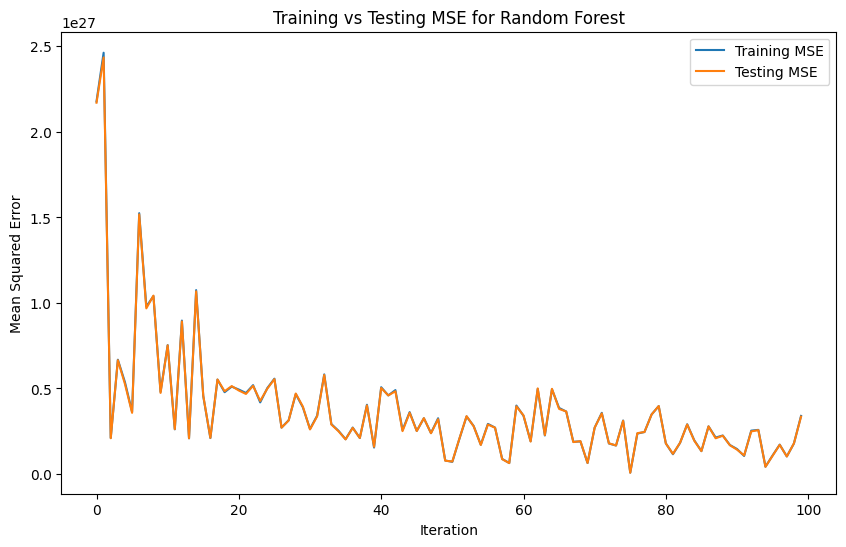

In [14]:
import matplotlib.pyplot as plt

# Plot MSE for training and testing sets
plt.figure(figsize=(10, 6))
plt.plot(loss_train, label="Training MSE")
plt.plot(loss_test, label="Testing MSE")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training vs Testing MSE for Random Forest")
plt.legend()
plt.show()


Plot Feature Importance

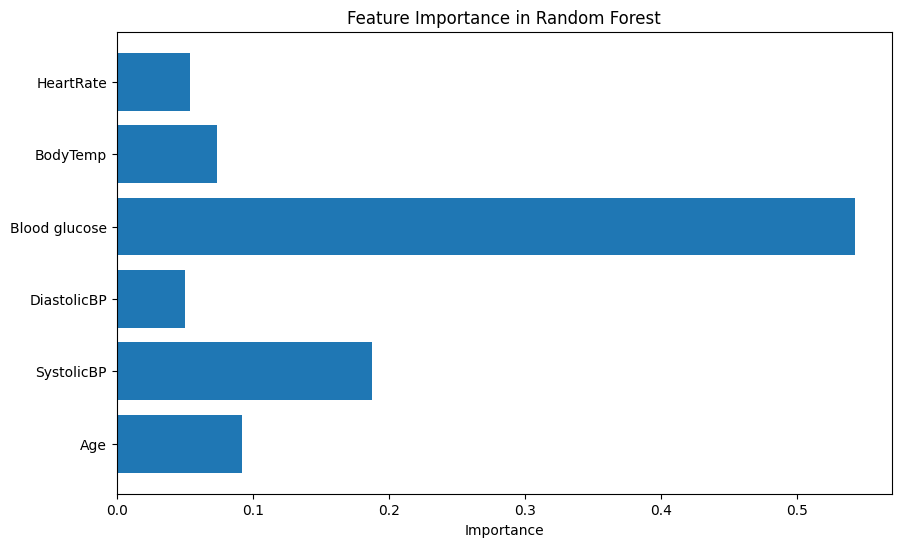

In [15]:
# Plot feature importances
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.show()


Scatter Plot: Predictions vs Actual Values

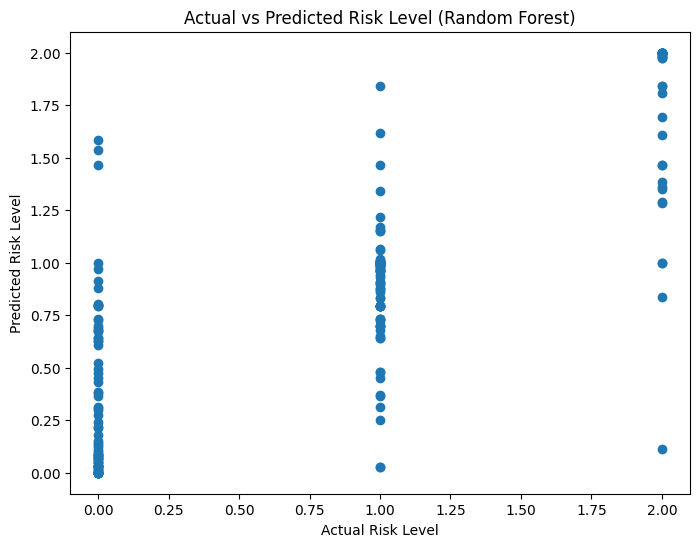

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Risk Level")
plt.ylabel("Predicted Risk Level")
plt.title("Actual vs Predicted Risk Level (Random Forest)")
plt.show()


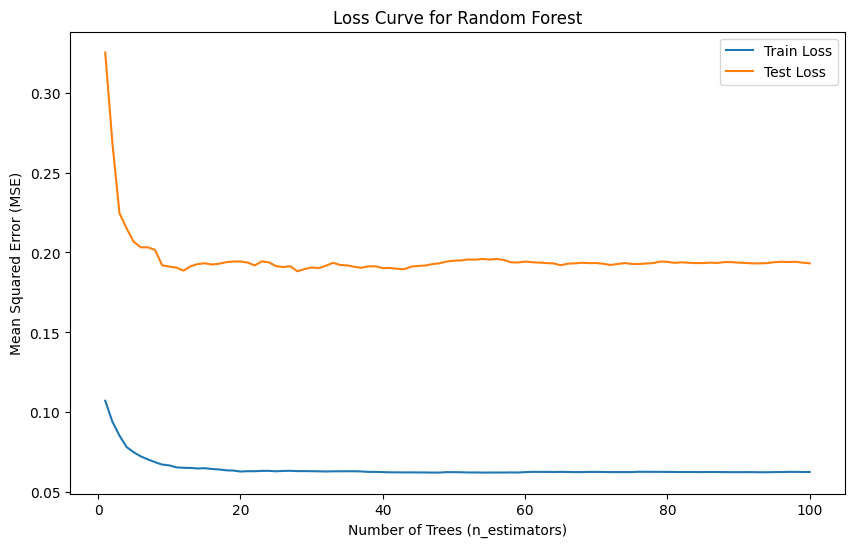

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Initialize lists to store losses
loss_train, loss_test = [], []

# Loop through different values of n_estimators (trees in the forest)
n_estimators_range = range(1, 101)
for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict for train and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate and store the Mean Squared Error
    loss_train.append(mean_squared_error(y_train, y_train_pred))
    loss_test.append(mean_squared_error(y_test, y_test_pred))

# Plot the loss (MSE) for train and test
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, loss_train, label="Train Loss")
plt.plot(n_estimators_range, loss_test, label="Test Loss")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Curve for Random Forest")
plt.legend()
plt.show()



"""
# Step 8: Model Comparison - Linear Regression, Decision Tree, Random Forest
"""

In [18]:
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate a dataset
X, y = make_regression(n_samples=1000, n_features=6, noise=0.1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check unique values in y
print("Unique values in y_train:", set(y_train))
print("Unique values in y_test:", set(y_test))

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

best_model, best_loss = None, float("inf")

# Iterate over models to find the best one
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {loss}")

    # Track best model
    if loss < best_loss:
        best_loss = loss
        best_model = (name, model)  # Store name and model

# Ensure a model was selected before saving
if best_model:
    print(f"\nBest model: {best_model[0]} with MSE: {best_loss}")  # Display best model
    joblib.dump(best_model[1], "best_model.pkl")  # Save the best model
    print(f"Best model ({best_model[0]}) saved as best_model.pkl!")
else:
    print("No best model found!")

# Load the best model for prediction
best_loaded_model = joblib.load("best_model.pkl")

# Example prediction
sample_input = [[25,130,80,15.0,98.0,86]]  # Must match n_features=10
prediction = best_loaded_model.predict(sample_input)
print("Prediction for sample input:", prediction)

Unique values in y_train: {np.float64(0.9916307045946295), np.float64(1.792190804755335), np.float64(4.624120275117297), np.float64(5.2513977169685475), np.float64(5.922707845445207), np.float64(5.410607736852906), np.float64(8.675540661531038), np.float64(8.26839964708812), np.float64(9.259249237310087), np.float64(11.779146414205998), np.float64(12.141512314652317), np.float64(13.040674545233134), np.float64(13.165620207281194), np.float64(15.319570750346271), np.float64(16.609130195712044), np.float64(16.11273550356087), np.float64(17.215584980148655), np.float64(19.78143652468439), np.float64(18.844431086766246), np.float64(21.60944730405612), np.float64(13.18319859677394), np.float64(19.238106451566427), np.float64(24.580106527455232), np.float64(25.435759451848046), np.float64(26.4694714354062), np.float64(23.87669006106453), np.float64(28.679759135591162), np.float64(26.98056628045292), np.float64(30.71253352596276), np.float64(30.70827432629062), np.float64(32.84219568058546), 

Model Evaluation & Analysis

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error
y_pred_test = best_loaded_model.predict(X_test)

# Evaluate performance on test data
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"R² score: {r2}")
print(f"Mean Absolute Error: {mae}")


R² score: 0.9999990225698093
Mean Absolute Error: 0.08592284517940409


"""
# Step 9: Save the Best Performing Model
"""

In [20]:
import joblib

if best_model:
    joblib.dump(best_model[1], "best_model.pkl")  # Save the model object
    print(f"Best model ({best_model[0]}) with MSE: {best_loss} saved as best_model.pkl!")
else:
    print("No best model found. Unable to save.")


Best model (Linear Regression) with MSE: 0.011515737996523234 saved as best_model.pkl!


In [32]:
import joblib
import numpy as np

# Load your trained model (Ensure the path is correct and accessible)
model_path = r'C:\Users\HP\linear_regression_model\summative\linear_regression\best_model.pkl'

# Load the model
model = joblib.load(model_path)

# Example input for testing (same format as the model expects)
test_input = np.array([ [30, 120, 80, 90.5, 37.0, 75] ])  # Ensure it's (1, 6)


# Make prediction
prediction = model.predict(test_input)[0]

# Interpret the prediction (assuming binary classification: 0 = Not Pregnant, 1 = Pregnant)
prediction_label = "Pregnant" if prediction == 1 else "Not Pregnant"

print(test_input.shape)  # Check the shape

# Output the result
print(f"Prediction: {prediction_label}")


ValueError: X has 6 features, but LogisticRegression is expecting 4 features as input.